In [21]:
import sys, os, random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

SEED = 41
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
print(f"Using Tensorflow {tf.__version__}")

Using Tensorflow 2.7.0


In [22]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(f"train_images.shape: {train_images.shape} - train_labels.shape: {train_labels.shape}\n"
      f"test_images.shape: {test_images.shape} - test_labels.shape: {test_labels.shape}")

train_images.shape: (60000, 28, 28) - train_labels.shape: (60000,)
test_images.shape: (10000, 28, 28) - test_labels.shape: (10000,)


In [24]:
from sklearn.model_selection import train_test_split

val_images, test_images, val_labels, test_labels = \
    train_test_split(test_images, test_labels, test_size=0.20, random_state=SEED)
print(f"train_images.shape: {train_images.shape} - train_labels.shape: {train_labels.shape}\n"
      f"val_images.shape: {val_images.shape} - val_labels.shape: {val_labels.shape}\n"
      f"test_images.shape: {test_images.shape} - test_labels.shape: {test_labels.shape}")

train_images.shape: (60000, 28, 28) - train_labels.shape: (60000,)
val_images.shape: (8000, 28, 28) - val_labels.shape: (8000,)
test_images.shape: (2000, 28, 28) - test_labels.shape: (2000,)


In [25]:
inp_shape = train_images.shape[1] * train_images.shape[2]
train_images = train_images.reshape((train_images.shape[0], inp_shape))
train_images = train_images.astype("float32") / 255.0
val_images = val_images.reshape((val_images.shape[0], inp_shape))
val_images = val_images.astype("float32") / 255.0
test_images = test_images.reshape((test_images.shape[0], inp_shape))
test_images = test_images.astype("float32") / 255.0
print(f"train_images.shape: {train_images.shape} - train_labels.shape: {train_labels.shape}\n"
      f"val_images.shape: {val_images.shape} - val_labels.shape: {val_labels.shape}\n"
      f"test_images.shape: {test_images.shape} - test_labels.shape: {test_labels.shape}")

train_images.shape: (60000, 784) - train_labels.shape: (60000,)
val_images.shape: (8000, 784) - val_labels.shape: (8000,)
test_images.shape: (2000, 784) - test_labels.shape: (2000,)


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [27]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(inp_shape,)),
    Dense(10, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop', metrics=['acc'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dense_6 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
hist = model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=25, batch_size=50)

Epoch 1/25
1200/1200 [==============================] - 10s 8ms/step - loss: 0.2105 - acc: 0.9388 - val_loss: 0.1192 - val_acc: 0.9640
Epoch 2/25
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0902 - acc: 0.9733 - val_loss: 0.0799 - val_acc: 0.9749
Epoch 3/25
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0633 - acc: 0.9816 - val_loss: 0.0794 - val_acc: 0.9787
Epoch 4/25
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0479 - acc: 0.9861 - val_loss: 0.0791 - val_acc: 0.9794
Epoch 5/25
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0366 - acc: 0.9894 - val_loss: 0.0801 - val_acc: 0.9789
Epoch 6/25
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0288 - acc: 0.9918 - val_loss: 0.0768 - val_acc: 0.9811
Epoch 7/25
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0225 - acc: 0.9936 - val_loss: 0.0850 - val_acc: 0.9794
Epoch 8/25
1200/1200 [==============================] - 9s 7m

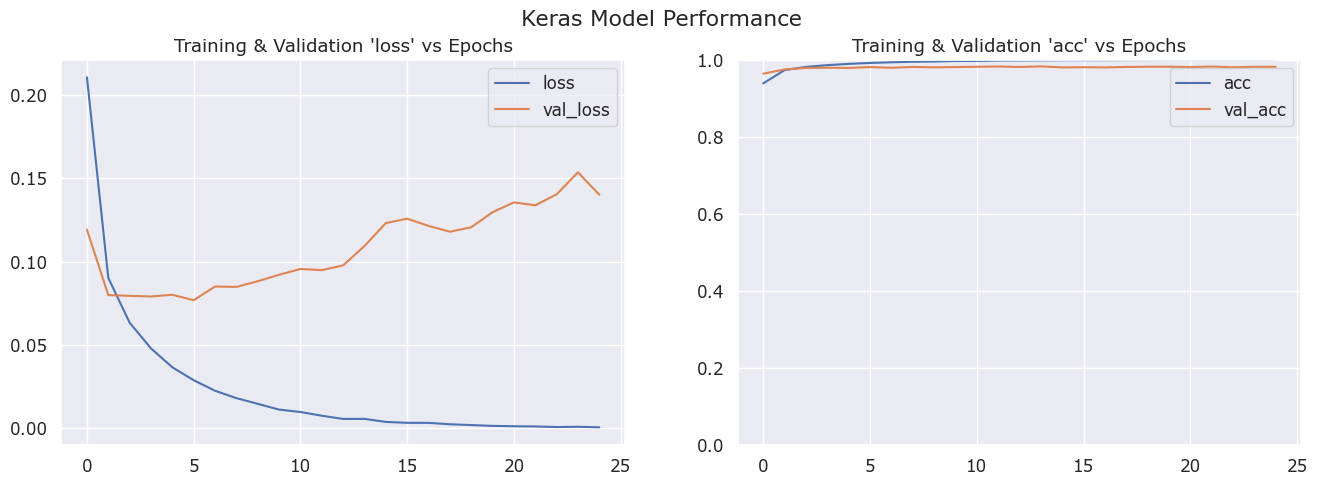

In [36]:
import kr_helper_funcs as kru

kru.show_plots(hist.history, metric="acc", plot_title="Keras Model Performance")

In [30]:
print("Evaluating model")
loss, acc = model.evaluate(train_images, train_labels)
print(f"  Training  -> loss: {loss:.3f} - {acc:.3f}")
loss, acc = model.evaluate(val_images, val_labels)
print(f"  Cross-val -> loss: {loss:.3f} - {acc:.3f}")
loss, acc = model.evaluate(test_images, test_labels)
print(f"  Testing   -> loss: {loss:.3f} - {acc:.3f}")

Evaluating model
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1239e-04 - acc: 0.9999
  Training  -> loss: 0.000 - 1.000
250/250 [==============================] - 1s 3ms/step - loss: 0.1401 - acc: 0.9819
  Cross-val -> loss: 0.140 - 0.982
63/63 [==============================] - 0s 3ms/step - loss: 0.1609 - acc: 0.9780
  Testing   -> loss: 0.161 - 0.978


In [35]:
# run predictions on test data
test_labels_pred_proba = model.predict(test_images)
test_labels_pred = np.argmax(test_labels_pred_proba, axis=1)
test_labels[:20], test_labels_pred[:20]

(array([4, 3, 0, 5, 7, 0, 2, 2, 5, 5, 7, 4, 9, 8, 4, 1, 0, 1, 3, 3], dtype=uint8),
 array([2, 3, 0, 5, 7, 0, 2, 2, 5, 5, 7, 4, 9, 8, 4, 1, 0, 1, 3, 3], dtype=int64))